
Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  1
Enter Employee ID:  8375
Enter Name:  fin aleen
Enter Department:  AI


Employee added successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  2
Enter Date (YYYY-MM-DD):  2024-09-09
Enter Employee ID:  8375
Enter Status (present/absent):  present


Attendance recorded successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  3



Attendance Report:
Employee ID: 8375, Total Days Present: 1

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  4



Department-Wise Attendance Report:
Department: AI, Total Days Present: 1

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  5


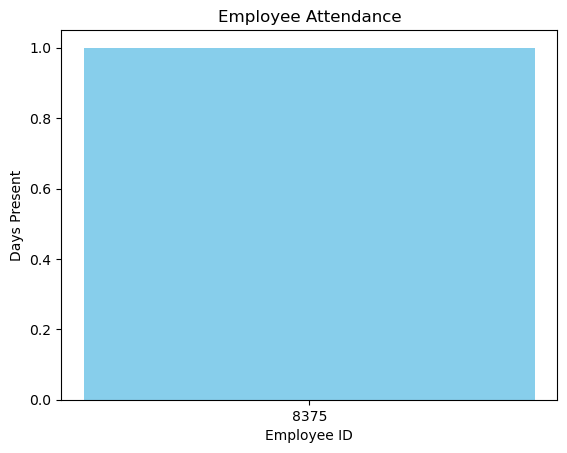


Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  1
Enter Employee ID:  8376
Enter Name:  fin bud
Enter Department:  AI


Employee added successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  2
Enter Date (YYYY-MM-DD):  2024-09-09
Enter Employee ID:  8376
Enter Status (present/absent):  present


Attendance recorded successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  1
Enter Employee ID:  8377
Enter Name:  fingud
Enter Department:  AI


Employee added successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  2
Enter Date (YYYY-MM-DD):  2024-09-09
Enter Employee ID:  8377
Enter Status (present/absent):  absent


Attendance recorded successfully.

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  3



Attendance Report:
Employee ID: 8375, Total Days Present: 1
Employee ID: 8376, Total Days Present: 1

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  4



Department-Wise Attendance Report:
Department: AI, Total Days Present: 2

Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


Enter your choice:  5


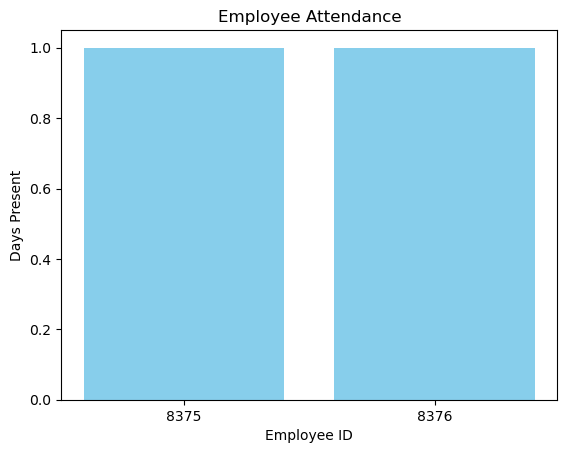


Employee Attendance Tracker
1. Add Employee
2. Add Attendance
3. Generate Attendance Report
4. Department-Wise Report
5. Generate Attendance Graph
6. Exit


In [ ]:

import csv
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# File paths
employee_file = 'employee.csv'
attendance_file = 'attendance.csv'

# Initialize system: Create files with headers if not already present
def initialize_system():
    if not os.path.exists(employee_file):
        with open(employee_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["ID", "Name", "Department"])
    if not os.path.exists(attendance_file):
        with open(attendance_file, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Date", "EmployeeID", "Status"])

# Add a new employee
def add_employee(emp_id, name, department):
    try:
        with open(employee_file, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                if row[0] == emp_id:
                    print("Employee already exists.")
                    return

        with open(employee_file, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([emp_id, name, department])
            print("Employee added successfully.")
    except FileNotFoundError:
        print("Employee file not found. Initializing system.")
        initialize_system()

# Validate employee ID
def validate_employee(emp_id):
    try:
        with open(employee_file, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                if row[0] == emp_id:
                    return True
        return False
    except FileNotFoundError:
        print("Employee file not found.")
        return False

# Add attendance record
def add_attendance(date, emp_id, status):
    if not validate_employee(emp_id):
        print("Invalid Employee ID. Attendance not recorded.")
        return

    try:
        with open(attendance_file, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                if row[0] == date and row[1] == emp_id:
                    print("Duplicate record. Attendance not recorded.")
                    return

        with open(attendance_file, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([date, emp_id, status])
            print("Attendance recorded successfully.")
    except FileNotFoundError:
        print("Attendance file not found. Initializing system.")
        initialize_system()

# Generate attendance report
def generate_report():
    try:
        attendance_summary = defaultdict(int)
        with open(attendance_file, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                if len(row) >= 3 and row[2].lower() == 'present':
                    attendance_summary[row[1]] += 1

        if not attendance_summary:
            print("No attendance data available.")
            return

        print("\nAttendance Report:")
        for emp_id, days_present in attendance_summary.items():
            print(f"Employee ID: {emp_id}, Total Days Present: {days_present}")
    except FileNotFoundError:
        print("Attendance file not found.")

# Generate department-wise attendance report
def department_report():
    try:
        with open(employee_file, 'r') as emp_file, open(attendance_file, 'r') as att_file:
            emp_reader = csv.reader(emp_file)
            att_reader = csv.reader(att_file)

            next(emp_reader)  # Skip headers
            next(att_reader)

            emp_dict = {row[0]: row[2] for row in emp_reader}  # {ID: Department}
            dept_summary = defaultdict(int)

            for row in att_reader:
                if len(row) >= 3 and row[2].lower() == 'present':
                    emp_id = row[1]
                    if emp_id in emp_dict:
                        dept_summary[emp_dict[emp_id]] += 1

        if not dept_summary:
            print("No department-wise attendance data available.")
            return

        print("\nDepartment-Wise Attendance Report:")
        for dept, count in dept_summary.items():
            print(f"Department: {dept}, Total Days Present: {count}")

    except FileNotFoundError:
        print("One or more files not found.")

# Generate attendance graph
def generate_graph():
    try:
        attendance_summary = defaultdict(int)
        with open(attendance_file, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                if len(row) >= 3 and row[2].lower() == 'present':
                    attendance_summary[row[1]] += 1

        if not attendance_summary:
            print("No attendance data available to generate a graph.")
            return

        ids = list(attendance_summary.keys())
        totals = list(attendance_summary.values())
        plt.bar(ids, totals, color='skyblue')
        plt.xlabel('Employee ID')
        plt.ylabel('Days Present')
        plt.title('Employee Attendance')
        plt.show()
    except FileNotFoundError:
        print("Attendance file not found.")

# Main menu
def main_menu():
    initialize_system()
    while True:
        print("\nEmployee Attendance Tracker")
        print("1. Add Employee")
        print("2. Add Attendance")
        print("3. Generate Attendance Report")
        print("4. Department-Wise Report")
        print("5. Generate Attendance Graph")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            emp_id = input("Enter Employee ID: ")
            name = input("Enter Name: ")
            dept = input("Enter Department: ")
            add_employee(emp_id, name, dept)

        elif choice == '2':
            date = input("Enter Date (YYYY-MM-DD): ")
            emp_id = input("Enter Employee ID: ")
            status = input("Enter Status (present/absent): ").lower()
            add_attendance(date, emp_id, status)

        elif choice == '3':
            generate_report()

        elif choice == '4':
            department_report()

        elif choice == '5':
            generate_graph()

        elif choice == '6':
            print("Exiting program. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the program
if __name__ == "__main__":
    main_menu()
